In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json('data.json')
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


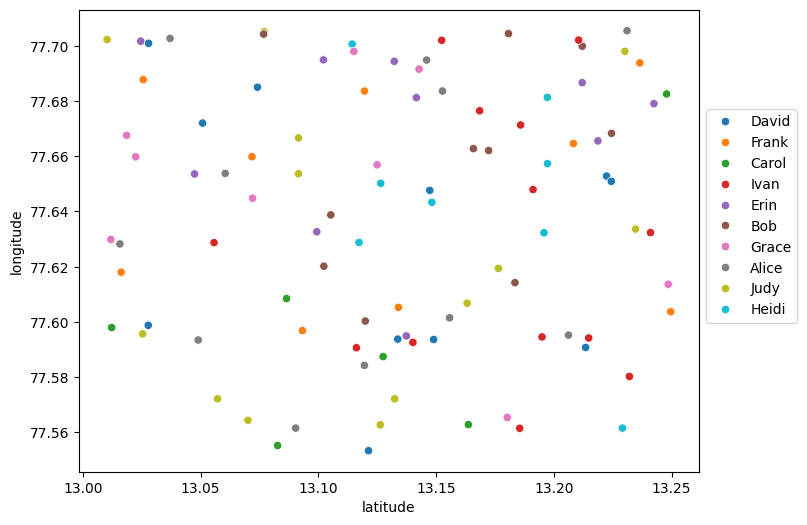

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

def get_infected_names(input_name, df):
    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass

    # Plotting
    labels = model.labels_
    fig = plt.figure(figsize=(12, 10))
    sns.scatterplot(x='latitude', y='longitude', hue=['cluster-{}'.format(x) for x in labels], data=df)
    plt.legend(bbox_to_anchor=[1, 1])
    plt.show()

    return infected_names




Enter the name to find potentially infected individuals: Ivan


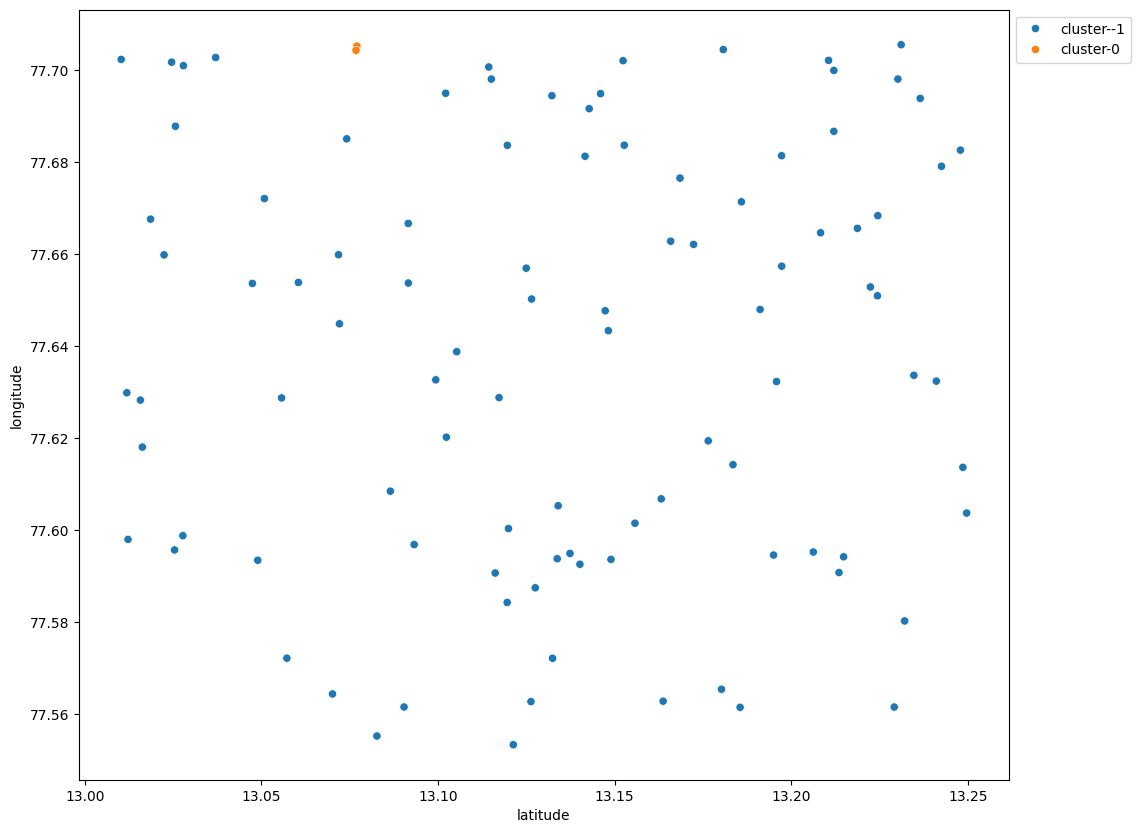

Potentially infected names: []


In [37]:
df = pd.read_json('data.json') # Make sure the file path is correct and the file has columns: 'id', 'latitude', 'longitude'

# Get input from the user
input_name = input("Enter the name to find potentially infected individuals: ")

# Call the function with the user-provided input
infected = get_infected_names(input_name, df)

# Print the result
print("Potentially infected names:", infected)